# 03. PyTorch Computer Vision


**`segmentaion` read about this**

might handy for the project

## 1. Computer vision libaries in PyTorch

* [`torchvision`](https://www.learnpytorch.io/03_pytorch_computer_vision/) - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu124
0.19.0+cu124


## 1. Getting a dataset

The dataset we'll be using in FashinMNIST from torchvision.datasets


In [2]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)
test_data = datasets.FashionMNIST(root = "data",
                                  train = False,
                                  download = True,
                                  transform=ToTensor(),
                                  target_transform= None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [10]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


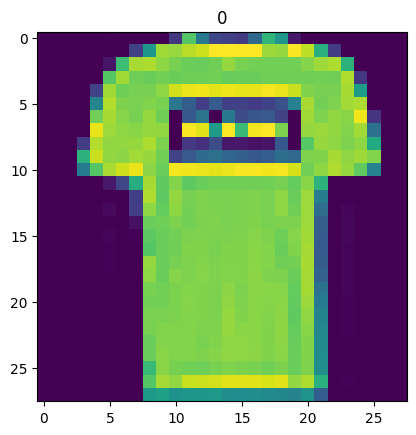

In [11]:
import matplotlib.pyplot as plt
image, label = train_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);
# image

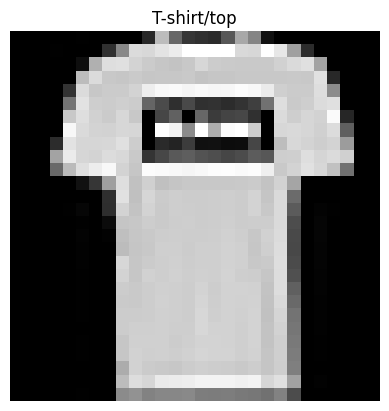

In [12]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

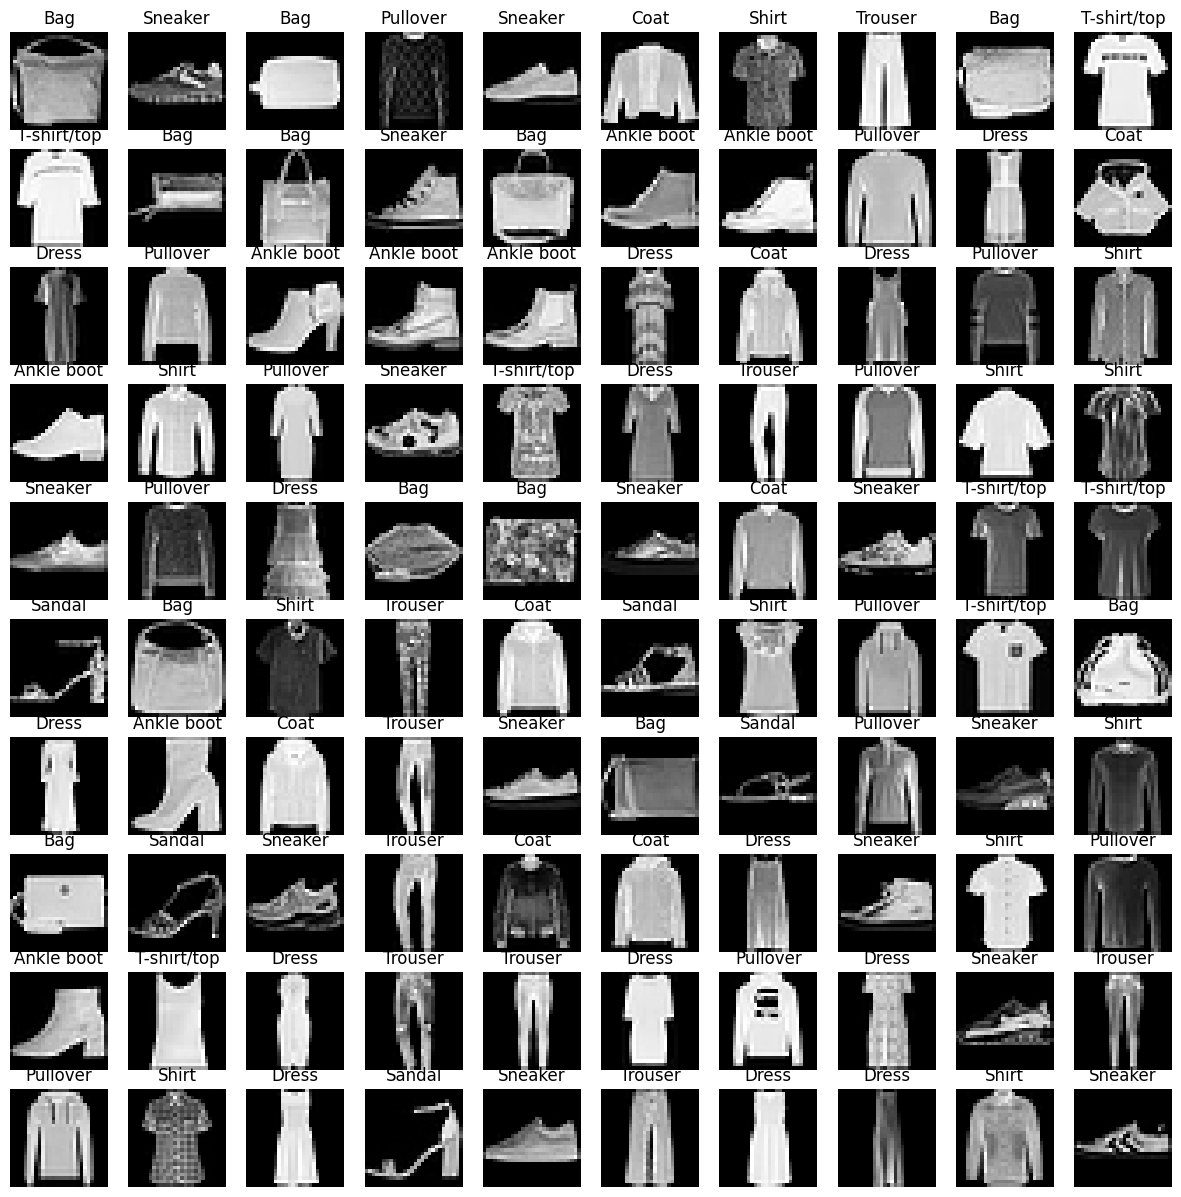

In [13]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(15,15))
rows, cols = 10, 10
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2. prepare DataLoader
 Right Now, our data is in the form of pytorch

**`DataLoader turn our datasets into a pytorch iterable.`**

the point is 
**`We want to turn our data into batches (or mini-Batches).`**

the reasons!

1. it is more computationally efficient , as in , our computing hardware may not be able to look (store in memory) at 60000 images in one hit. so we breake it down to any batches like 32 , 18 or anything which help the model train in the device in bettter form

2. It gives our neural network more chance to upadte its gradients per epoch.


 

In [14]:
from torch.utils.data import DataLoader

# Setup the batch size
Batch_size = 32

# Turns datasets into iterables(Batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = Batch_size,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = Batch_size,
                             shuffle = False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x24c172a8800>,
 <torch.utils.data.dataloader.DataLoader at 0x24c11b26600>)

In [15]:
# lets's check out whats we've created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} betcehs of {Batch_size}")
print(f"Length of test_dataloader:{len(test_dataloader)} betches of {Batch_size}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000024C172A8800>, <torch.utils.data.dataloader.DataLoader object at 0x0000024C11B26600>)
Length of train_dataloader: 1875 betcehs of 32
Length of test_dataloader:313 betches of 32


In [16]:
# Checks out whats inside our training dataloader
train_features , train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


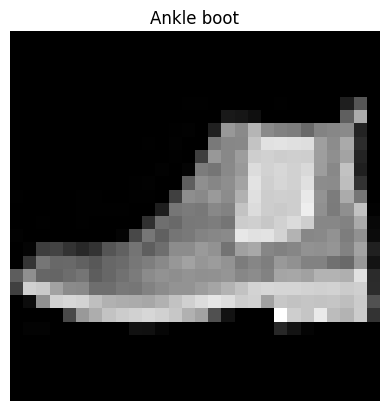

In [17]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features), size=[1]).item()
img, label = train_features[random_idx], train_labels[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a Basline model




In [18]:
# create a flatten Layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print ou twhat happened
print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")

shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


{x.shape} -> [color_channels, height, width]"

{output.shape} -> [color_channels, height `*`width]"

In [19]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_unit: int,
                 output_shapes: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_unit),
            nn.Linear(in_features = hidden_unit,
                      out_features = output_shapes)
        )

def forward(self, x):
    return self.layer_stack(x)

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, 
    hidden_unit = 10, #how many units in the hidden layer
    output_shapes = len(class_names) # one for every class
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

* **Summary**

* **`Purpose`** : Flatten is used to convert multi-dimensional tensors into a flat, 1-dimensional tensor.
Common 

* **`Usage`**: It is often used between convolutional layers and fully connected layers in neural networks.

* **`PyTorch Implementation`**: You can use nn.Flatten() as a layer or torch.flatten() as a function.
This operation is essential in neural networks for transitioning from convolutional to fully connected layers.

import torch.nn as nn

class SimpleCNN(nn.Module):
     def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16 * 28 * 28, 10)  #Fully connected layer

    def forward(self, x):
        x = self.conv1(x)
        x = self.flatten(x)  # Flatten the output
        x = self.fc1(x)  # Pass it through the fully connected layer
        return x

##### Instantiate the model and print
model = SimpleCNN()
print(model)


### 6.1 Setup loss, optimizer and evaluation metrics


In [22]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops 

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`
